# **Analysing the data**
---

In [1]:

# Import pandas
import pandas as pd
# Import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fast")

# Load the data
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.info()

--2024-06-01 10:17:55--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2024-06-01 10:17:55 (3.91 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int

In [2]:
 # add a new column named day to the dataframe by extracting the day component
 # from the existing dteday column.
 # The new column represents the day of the month, from 1 to 31.
bike_data["day"] = pd.to_datetime(bike_data["dteday"]).dt.day

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


## Descriptive statistics of the data

### Numeric features
+ Descriptive statistics of numeric features and the label

In [4]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


## Drawing general observations from the data

### Visualize distribution of the label / `rentals`
+ Using a histogram and boxplot

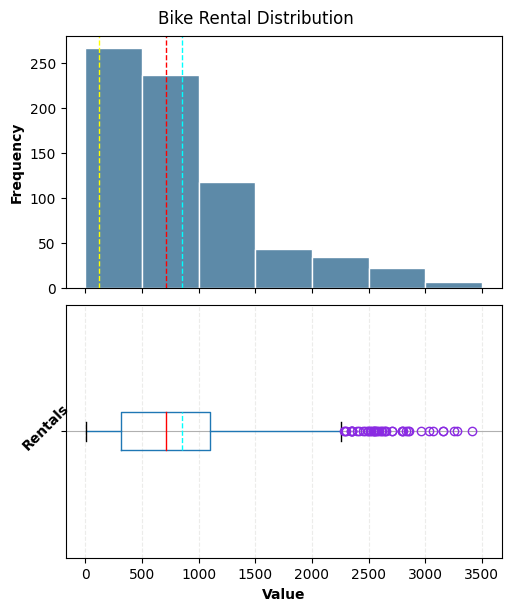

In [5]:
# Specify a subplot with two axes: 2 row, 1 column
fig, axs = plt.subplots(2, 1, figsize=(5, 6), layout="constrained", sharex=True)

# The histogram
bike_data["rentals"].plot.hist(color="#5D8AA8",
                               bins=range(0, 4000, 500),
                               edgecolor="#ffffff",
                               ax=axs[0])
axs[0].set_ylabel("Frequency", weight="black")

# Add lines for the mean, median, mode
axs[0].axvline(x=bike_data["rentals"].mean(), color = 'cyan', linestyle='--', linewidth = 1)
axs[0].axvline(x=bike_data["rentals"].median(), color = 'red', linestyle='--', linewidth = 1)
axs[0].axvline(x=bike_data["rentals"].mode()[0], color = 'yellow', linestyle='--', linewidth = 1)

# The Boxplot
bike_data.boxplot(column="rentals",
              showfliers=True,
              showmeans=True,
              meanline=True,
              meanprops = dict(color = 'cyan', linestyle='dashed', linewidth = 1),
              medianprops= dict(color = 'red', linestyle='-', linewidth = 1),
                  flierprops= dict(marker="o", markeredgecolor="#8A2BE2"),
              vert=False,
                  ax=axs[1])
axs[1].set_yticklabels([])
axs[1].set_ylabel("Rentals", rotation=45, weight="black")
axs[1].set_xlabel('Value', weight="black")
axs[1].grid(axis="x", color="#e5e4e2", linestyle="--", alpha=0.7)

# Add a title to the Figure
fig.suptitle('Bike Rental Distribution')

plt.show()

> **Insights from the above plots:**
+ The number of daily rentals ranges from 0 to just over 3,400.
+ The mean (and median) number of daily rentals is closer to the low end of that range
+ Most of the data ranges between 0 and around 2,200 rentals

### Visualize distribution of the numeric features
+ Plot histograms for each numeric feature

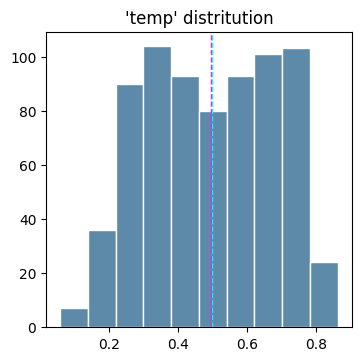

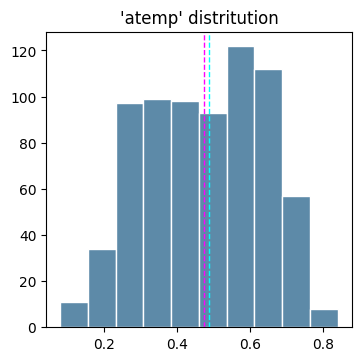

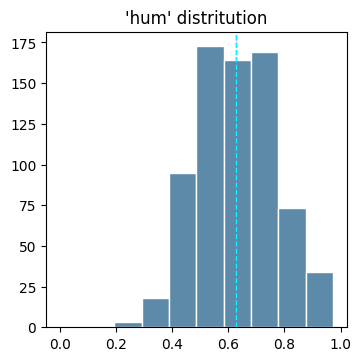

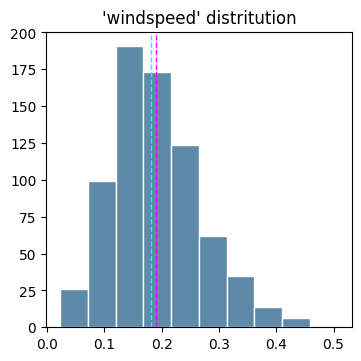

In [6]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

# Using a for loop:
for col in numeric_features:
  fig, ax = plt.subplots(figsize=(3.5,3.5), layout="constrained")
  ax.hist(x=bike_data[col], edgecolor="#ffffff", color="#5D8AA8") # / bike_data[col].plot.hist(ax=ax)
  ax.axvline(bike_data[col].mean(), color='magenta', linestyle='dashed', linewidth=1)
  ax.axvline(bike_data[col].median(), color='cyan', linestyle='dashed', linewidth=1)
  ax.set_title(f"'{col}' distritution")

  plt.show()
  print("\n")

> **Insights from the Histograms:**
+ Numeric features seem to be somewhat normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are

### Visualize distribution of categorical features
> Since these aren't continuous numbers on a scale, a histogram cannot be used; but rather a bar chart showing the count of each discrete value for each category.
+ Plot bar graphs for each
+ Make use of the [`Series.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function to calculate counts for each unique value

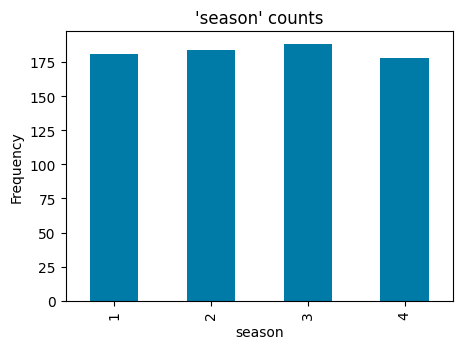

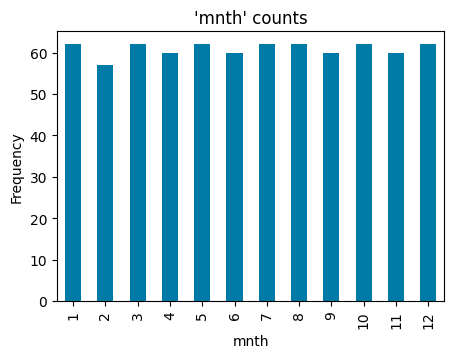

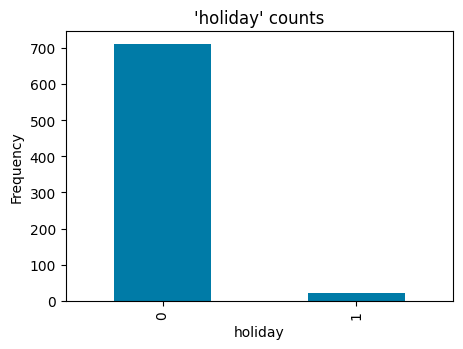

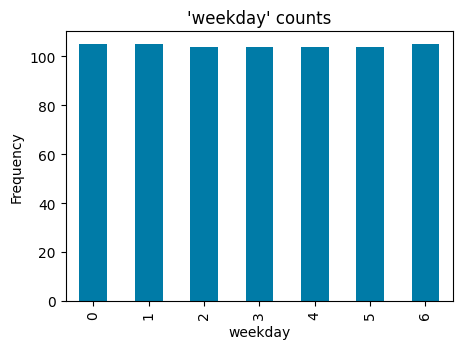

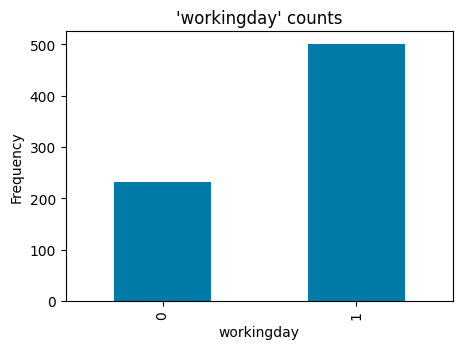

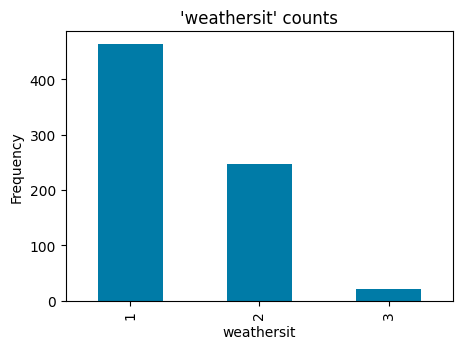

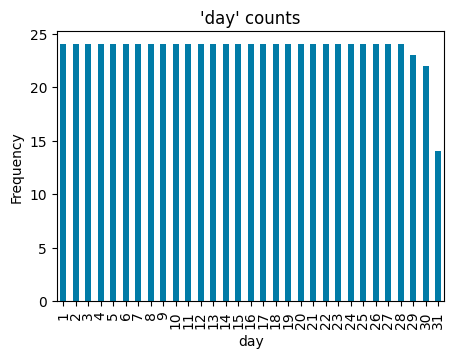

In [7]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
# for loop
for col in categorical_features:
  fig, ax = plt.subplots(figsize=(5, 3.5))
  bike_data[col].value_counts().sort_index().plot.bar(ax=ax, color="#007BA7")
  ax.set_ylabel("Frequency")
  ax.set_title(f"'{col}' counts")
  plt.show()
  print("\n")

> **Insights from the Bar Plots of categorical feature   counts:**  
>> Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:
+ **holiday:** The dataset contains fewer observations recorded on holidays, compared to non-holidays  
+ **workingday:** The dataset contains more observations recorded on workingdays than non-working days  
+ **weathersit:** Most days are category 1 (clear), with category 2 (mist and cloud) the next most common. There are comparatively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all.

### Relationship between `rentals` and numeric features
+ Generate scatter plots

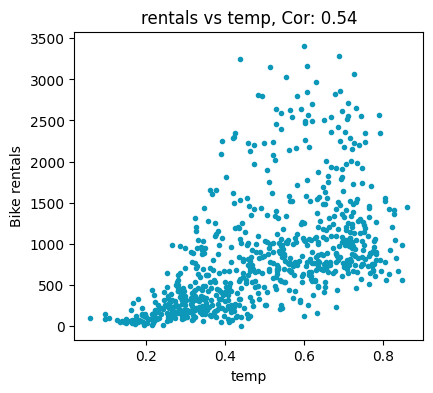

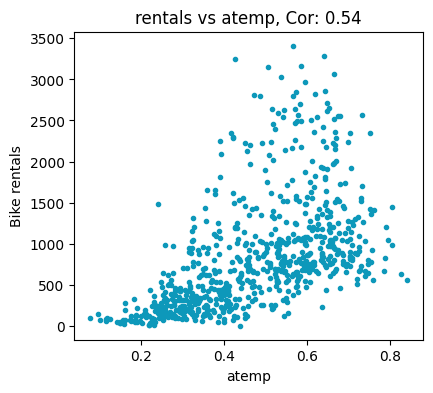

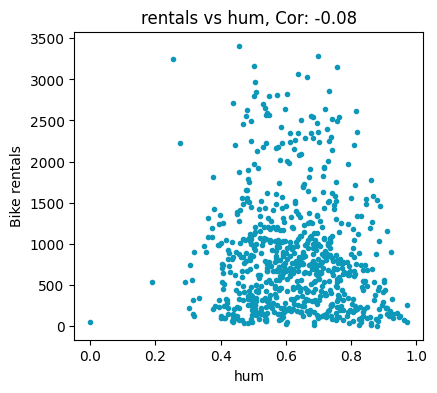

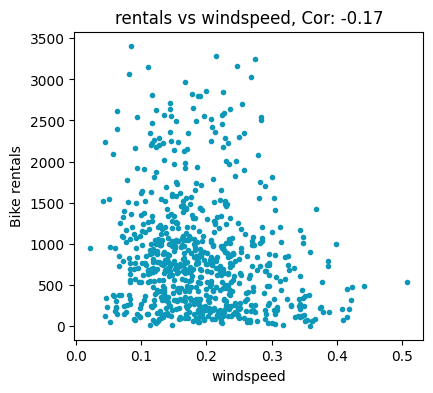

In [8]:
for col in numeric_features:
  fig, ax = plt.subplots(figsize=(4.5,4))

  ax.scatter(bike_data[col], bike_data["rentals"], color="#0D98BA", marker=".")
  ax.set_ylabel("Bike rentals")
  ax.set_xlabel(col)
  # Correlation between rentals and numeric label
  val_corr = bike_data["rentals"].corr(bike_data[col])
  # Round off the value to 2 Decimal Places
  val_corr = round(val_corr, 2)
  # Include correlation value in title
  ax.set_title(f"rentals vs {col}, Cor: {val_corr}")

  plt.show()
  print("\n")

> **Insights from the scatter plots above:**  
>> + A close look at the scatter plots for `temp` and `atemp`, reveals a vague diagonal trend showing that higher `rental` counts tend to coincide with higher temperatures (and vise versa), and a correlation value of just over 0.5 for both of these features supports this observation.

>> + Conversely, the plots for `hum` and `windspeed` show a negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed.

### Relationship between `rentals` and categorical features
+ For this, box plots will be used to show the distribution of rental counts for each category, against `rental` counts

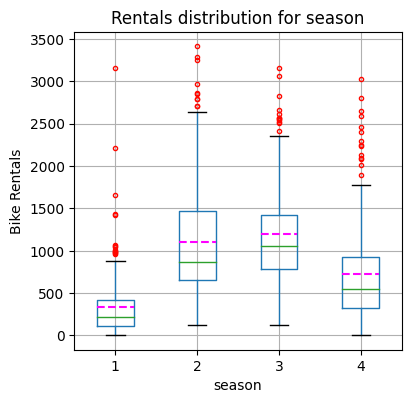

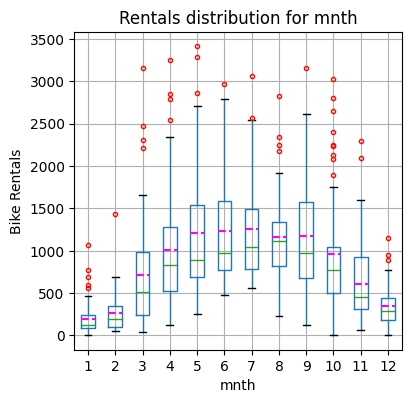

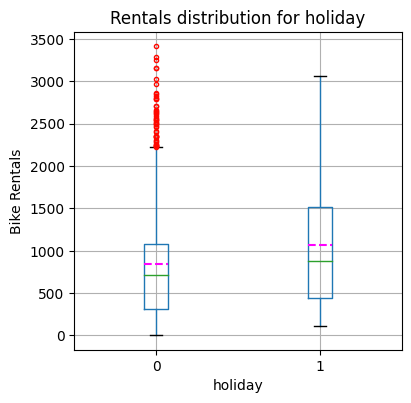

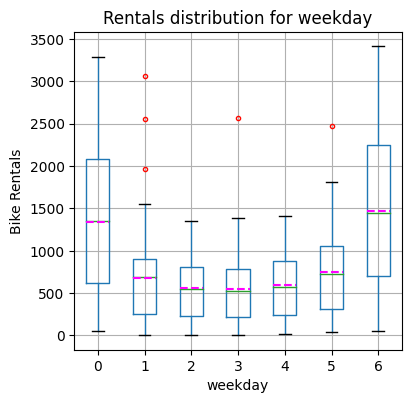

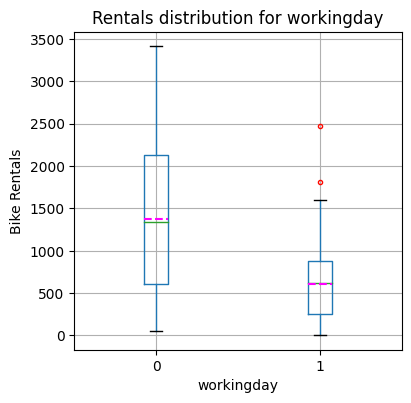

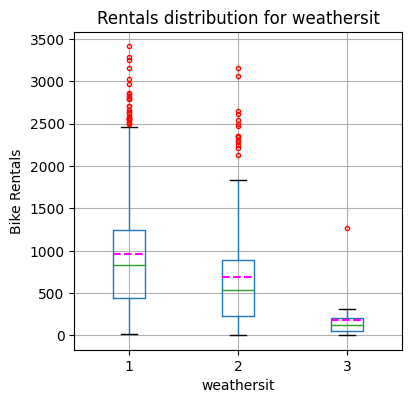

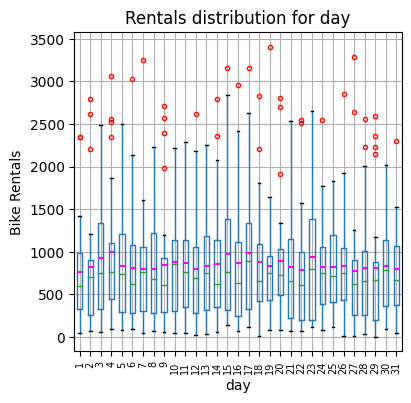

In [9]:
for col in categorical_features:
  fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")

  bike_data.boxplot(column = 'rentals',
                    by = col,
                    ax = ax,
                    meanline=True,
                    showmeans=True,
                    meanprops=dict(color="#FF00FF", linestyle="--", linewidth=1.5),
                    flierprops=dict(markeredgecolor="#FF0800", marker="."))
  ax.set_ylabel("Bike Rentals")
  ax.set_title(f"Rentals distribution for {col}")
  fig.suptitle("")
  # For the plot with day
  if col == "day":
    ax.set_xticklabels(range(1,32), rotation=90, fontsize=7)

  plt.show()
  print("\n")

> **Insights from the boxplots above:**  
There's a noticeable trend that shows different rental distributions for the following categorical features:  
+ `weekday` - weekends (days `0`, & `6`) have higher rental distribution campared to working days (`1`- `5`)
+ `holiday` - notable higher rental distributions during public holiday days compared to normal days
+ `workingday` - notable higher rental distributions during non-working (weekend or holiday) days compared to workingdays
+ `season` - spring and summer seasons have higher rental distributions compared to winter and fall
+ `month` - spring and summer months (`3`- `8`) have higher rental distributions compared to winter and fall months (`9` - `2`)
+ `weathersit` - higher rental distributions when the weather is clear (`1`), and rentals plummet as the weather deteriorates (`2`, `3`)

>> + The `day` feature that was created for the day of the month shows little variation, indicating that it's probably **not** predictive of the number of rentals




# **In conclusion**
> From the analysis, the predictive features of the label (`rentals`) appear to be:  
+ `season`, `mnth`, `holiday`,`weekday`,`workingday`,`weathersit`,`temp`, `atemp`, `hum` & `windspeed`